# 2. PLA (Perceptron Learning Algorithm)
#### Source : Class Material and https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/

In [279]:
from csv import reader
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [6]:
#1) Generation of the data and labeling. (10 points)

### Loading the Sonar dataset


In [280]:

#loading the data
os.chdir(r'D:\Fall 2021\Applied ML - AIT 736\HW2')   
import pandas as pd
input_file ='sonar_csv.csv'

df = pd.read_csv(input_file)
df.head()


,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class,Class.1,Unnamed: 62
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1,Rock,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1,Rock,NaN
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1,Rock,NaN
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1,Rock,NaN
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1,Rock,NaN


This dataset has the sonar chirp(sharp sound) returns (Rock or Mine) bouncing off different services. There are 60 input variables which are the strength of the returns at different angles. It is a binary classification problem that requires a model to differentiate rocks from metal cylinders. All of the variables are continuous and generally in the range of 0 to 1. Generally we do normalization i.e., getting all the feature values to a fixed range because if for suppose feature 1 has very larger value than feature 2, then feature 1 influences the result more due to it's larger value and this does not mean feature 1 is more important as a predictor. The output variable is a string “M” for mine and “R” for rock, which will need to be converted to integers 0 and 1. I have converted the string values to 0's and 1's in Excel .csv file and then imported the data.

In [281]:
# printing the input and output features
x = df.iloc[0:, 0:60].values # 60 input features from the dataframe
y = df.iloc[:, 60].values  # class variable Rock - 1, Mine - 0
print(x)
print(y) 
print(df.dtypes)# printing the datatypes of the input features in the dataset

[[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_59    float64
attribute_60    float64
Class             int64
Class.1          object
Unnamed: 62      object
Length: 63, d

In [282]:
#splitting the train data(75%) and test data (25%) randomly with random_state = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)
print('length of traning data(input features): ',len(x_train),'\n\n')

print('length of testing data(input feature): ',len(x_test),'\n\n')
print('length of traning data(output features): ',len(y_train),'\n\n')
print('length of testing data(output feature): ',len(y_test),'\n\n')
print('Display of the Training and Testing Data \n')
print((x_train),'\n\n')
print((x_test),'\n\n')
print((y_train),'\n\n')
print((y_test),'\n\n')


length of traning data(input features):  156 


length of testing data(input feature):  52 


length of traning data(output features):  156 


length of testing data(output feature):  52 


Display of the Training and Testing Data 

[[0.0411 0.0277 0.0604 ... 0.005  0.0085 0.0044]
 [0.005  0.0017 0.027  ... 0.0063 0.0017 0.0028]
 [0.0223 0.0375 0.0484 ... 0.0093 0.0059 0.0022]
 ...
 [0.0228 0.0106 0.013  ... 0.0045 0.0063 0.0039]
 [0.0373 0.0281 0.0232 ... 0.0054 0.0085 0.006 ]
 [0.018  0.0444 0.0476 ... 0.005  0.0073 0.0022]] 


[[0.0079 0.0086 0.0055 ... 0.0058 0.0059 0.0032]
 [0.0229 0.0369 0.004  ... 0.0029 0.0104 0.0163]
 [0.0442 0.0477 0.0049 ... 0.0105 0.0059 0.0105]
 ...
 [0.0599 0.0474 0.0498 ... 0.0114 0.0112 0.01  ]
 [0.0151 0.032  0.0599 ... 0.0019 0.0023 0.0062]
 [0.0335 0.0134 0.0696 ... 0.0377 0.0126 0.0156]] 


[0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0
 1 0 1 1 0 

### Train Data

In [283]:
train=list()
for a,i in enumerate(x_train):
    p=list(i)
    #print(a)
    #print(str(y_train[a]))
    p.append ((y_train[a]) )
    #print(p)
    train.append(p)
    #print(train)
    
print('Training data with input and output features:  ',train  ,end='')

Training data with input and output features:   [[0.0411, 0.0277, 0.0604, 0.0525, 0.0489, 0.0385, 0.0611, 0.1117, 0.1237, 0.23, 0.13699999999999998, 0.1335, 0.2137, 0.1526, 0.0775, 0.1196, 0.0903, 0.0689, 0.2071, 0.2975, 0.2836, 0.3353, 0.3622, 0.3202, 0.3452, 0.3562, 0.3892, 0.6622, 0.9254, 1.0, 0.8528, 0.6297, 0.525, 0.4012, 0.2901, 0.2007, 0.3356, 0.4799, 0.6147, 0.6246, 0.4973, 0.3492, 0.2662, 0.3137, 0.4282, 0.4262, 0.3511, 0.2458, 0.1259, 0.0327, 0.0181, 0.0217, 0.0038, 0.0019, 0.0065, 0.0132, 0.0108, 0.005, 0.0085, 0.0044, 0], [0.005, 0.0017, 0.027000000000000003, 0.045, 0.0958, 0.083, 0.0879, 0.122, 0.1977, 0.2282, 0.2521, 0.3484, 0.3309, 0.2614, 0.1782, 0.2055, 0.2298, 0.3545, 0.6218, 0.7265, 0.8346, 0.8268, 0.8366, 0.9408, 0.951, 0.9801, 0.9974, 1.0, 0.9036, 0.6409, 0.3857, 0.2908, 0.204, 0.1653, 0.1769, 0.114, 0.07400000000000001, 0.0941, 0.0621, 0.0426, 0.0572, 0.1068, 0.1909, 0.2229, 0.2203, 0.2265, 0.1766, 0.1097, 0.0558, 0.0142, 0.0281, 0.0165, 0.0056, 0.001, 0.0027, 0.0

### Test Data

In [284]:
test=list()
for a,i in enumerate(x_test):
    p=list(i)
    #print(float(p[a]))
    #print(str(y_train[a]))
    p.append ((y_test[a]) )
    #print(type(p[a]))
    test.append(p)
    #print(train)
    
print('Testing data with input and output features:  ',test  ,end='')


Testing data with input and output features:   [[0.0079, 0.0086, 0.0055, 0.025, 0.0344, 0.0546, 0.0528, 0.0958, 0.1009, 0.124, 0.1097, 0.1215, 0.1874, 0.3383, 0.3227, 0.2723, 0.3943, 0.6432, 0.7271, 0.8673, 0.9674, 0.9847, 0.948, 0.8036, 0.6833, 0.5136, 0.309, 0.0832, 0.4019, 0.2344, 0.1905, 0.1235, 0.1717, 0.2351, 0.2489, 0.3649, 0.3382, 0.1589, 0.0989, 0.1089, 0.1043, 0.0839, 0.1391, 0.0819, 0.0678, 0.0663, 0.1202, 0.0692, 0.0152, 0.0266, 0.0174, 0.0176, 0.0127, 0.0088, 0.0098, 0.0019, 0.0059, 0.0058, 0.0059, 0.0032, 1], [0.0229, 0.0369, 0.004, 0.0375, 0.0455, 0.1452, 0.2211, 0.1188, 0.075, 0.1631, 0.2709, 0.3358, 0.4091, 0.44, 0.5485, 0.7213, 0.8137, 0.9185, 1.0, 0.9418, 0.9116, 0.9349, 0.7484, 0.5146, 0.4106, 0.3443, 0.6981, 0.8713, 0.9013, 0.8014, 0.43799999999999994, 0.1319, 0.1709, 0.2484, 0.3044, 0.2312, 0.1338, 0.2056, 0.2474, 0.27899999999999997, 0.161, 0.0056, 0.0351, 0.1148, 0.1331, 0.0276, 0.0763, 0.0631, 0.0309, 0.024, 0.0115, 0.0064, 0.0022, 0.0122, 0.0151, 0.0056, 0.002

#### Perceptron (PLA)
Perceptron is a neural network unit which does some computations to detect the features in the input data. The Perceptron similar to the neurons in the human body, receives input signals from examples of training data. One iteration of the PLA updates the weights w for a misclassified point. This misclassified point acts as a protagonist in updating the weight vector in each iteration. This algorithmn stops and is done when there are no further misclassified points. If the given data is not linearly separable then Perceptron Learning Algorithmn will never converge. So let's see if the data is linearly separable or not by calculating the accuracy. If we get 100% accuracy then we can say that this dataset can be linearly separable using Perceptrong learning algorithm. The output of the PLA is the sign of the linear equation when calculated with the corresponding data points.

In [285]:
#function to predict the sign of the output feature given the input feature and its corresponding weight
def prediction(row,weights):
    activation =weights[0]
    for i in range(len(row)-1):
        #print('jhj')
        
        activation += weights[i+1] * row[i]
        #print(activation)
    if(activation >= 0):
        return 1
    else:
        return 0
    

####  Stochastic Gradient Descent
The weights for linear equation i.e, for the perceptron algorithm can be determined using stochastic gradient descent. First let's see what actaully id Gradient Descent. Gradient Descent is a popular optimization technique in Machine Leaning and can be used with most of the learning algorithms. Gradient is more like the slope of the function. Slope measures the degree of the change of change of a variable in reponse to the change of another variable. Mathematically, Gradient Descent is a convex function whose output is the partial derivative of a set of parameters of its inputs. The greater the gradient, the steeper the slope. Starting from an initial value, Gradient Descent is run iteratively to find the optimal values of the parameters to find the minimum possible value of the given cost function. The main difference between stochastic and normal Gradient descent is Stochastic Gradient Descent uses a few randomly selected samples/single traning sample instead of the whole data set for each iteration. When we use whole dataset and if it turned out to be huge (Big Data) then using whole dataset will be computationally very expensive to compute.Learning Rate is Used to limit the amount each weight is corrected each time it is updated.
Epochs is nothing but the number of iterations or the number of times to run through the training data while updating the weight.

In [286]:
# Estimate Perceptron weights using stochastic gradient descent

def train_weight(train_data,learning_rate,n_epoch):
    weight = [0.0 for i in range (len(train_data[0]))] 
    #print(weight)
    for epoch in range(n_epoch):
        sum_squ_error = 0
        for row in train_data:
            #print('each row of dataset: ',row,'weights:  ',weight)
            prediction_ =prediction(row,weight)
            #print('prediction:   ',prediction_)
            error = row[-1] - prediction_
            sum_squ_error+= error**2
            #print(sum_squ_error)
            weight[0]= weight[0] + learning_rate*error
            for i in range(len(row)-1):
                weight[i+1]  = weight[i+1] + (error * learning_rate * row[i])
                #print(( row[i] ))
        print('epoch: ',epoch, 'learning_rate: ',learning_rate,'sum_squ_error: ',sum_squ_error )
    print('\n\nweights:  ',weight)
    return weight

### Perceptron Model

In [287]:
# Perceptron Algorithm With Stochastic Gradient Descent
# Predicting the sign of the test data using the weights calculated from the traning data 
def perceptron(train,test2,learning_rate,n_epoch):
    weights = train_weight(train,learning_rate,n_epoch)
    predictions_test1=list()
    for row in test2:
        #print(row)
        t=([float(x) for x in row])
        #print('--------------',len(t),len(weights))
        prediction_test =prediction(t, weights)
        predictions_test1.append(prediction_test)
    #print('pred', (predictions_test1) ,len(test2) )  
    return predictions_test1     

In [288]:
#with number of iterations as 250 and learning rate of 0.1
perceptron_predic =perceptron(train,x_test,0.1,250)
#the final weights can be seen at the bottom of this ouput cell
#'predicted signs for the test input features'
print('predicted signs for the test input features:   ',perceptron_predic,end='')

epoch:  0 learning_rate:  0.1 sum_squ_error:  73
epoch:  1 learning_rate:  0.1 sum_squ_error:  63
epoch:  2 learning_rate:  0.1 sum_squ_error:  54
epoch:  3 learning_rate:  0.1 sum_squ_error:  51
epoch:  4 learning_rate:  0.1 sum_squ_error:  53
epoch:  5 learning_rate:  0.1 sum_squ_error:  44
epoch:  6 learning_rate:  0.1 sum_squ_error:  47
epoch:  7 learning_rate:  0.1 sum_squ_error:  48
epoch:  8 learning_rate:  0.1 sum_squ_error:  47
epoch:  9 learning_rate:  0.1 sum_squ_error:  34
epoch:  10 learning_rate:  0.1 sum_squ_error:  49
epoch:  11 learning_rate:  0.1 sum_squ_error:  38
epoch:  12 learning_rate:  0.1 sum_squ_error:  42
epoch:  13 learning_rate:  0.1 sum_squ_error:  41
epoch:  14 learning_rate:  0.1 sum_squ_error:  44
epoch:  15 learning_rate:  0.1 sum_squ_error:  33
epoch:  16 learning_rate:  0.1 sum_squ_error:  39
epoch:  17 learning_rate:  0.1 sum_squ_error:  39
epoch:  18 learning_rate:  0.1 sum_squ_error:  41
epoch:  19 learning_rate:  0.1 sum_squ_error:  39
epoch:  20

In [289]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [290]:
#converting array of test output features to list
test_y=list()
for x in y_test:
    #print(type(x))
    test_y.append(int(x))
print(test_y,end='')

[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0]

#### Accuracy

In [291]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

accuracy = accuracy_metric(test_y, perceptron_predic)
print(accuracy) #69.23076923076923

69.23076923076923


In [48]:
n_epoch=list()
accuracy1=list()
for epoch in range(150,950,100):
    #print(i)
    predicted=perceptron(train,x_test,0.1,epoch)
    #print('predicted   :',predicted)
    accuracy = accuracy_metric(test_y, predicted)
    n_epoch.append(epoch)
    accuracy1.append(accuracy)
    print('\nwhen epoch= ', epoch, 'accuracy is:  ' ,accuracy,'\n\n')

weights:   [2.600000000000001, -1.7593700000000325, -0.5592900000000071, 2.1125000000000123, 0.08654999999999916, -1.512509999999985, 0.16150999999999566, 1.136540000000004, 0.402359999999999, 1.4278099999999958, -1.6580200000000247, -2.3653599999999377, -1.4166799999999877, 0.6923599999999953, -1.1568999999999816, 0.9763300000000165, 1.4095399999999716, 1.0380199999999968, -1.7222299999999866, -0.5495999999999961, -0.33231000000000155, -0.3635700000000005, -0.3703699999999999, 1.1905299999999899, -2.7533100000000044, 0.8283599999999876, 1.0268699999999895, -1.0488400000000093, 0.8634799999999951, -0.0943299999999937, -2.502380000000017, 2.946749999999922, -1.030139999999997, -0.29379999999999284, 1.9727899999999703, -1.4259299999999984, 0.4412399999999921, 3.414289999999987, -1.1236899999999992, -1.4407600000000107, 2.1347800000000006, -0.6182499999999986, 0.14294999999999403, -2.6387400000000385, -1.0378700000000705, -0.9052200000000115, 0.6045300000000003, -0.666239999999968, -4.477

### Plot of Accuracy v/s Count of Epoch

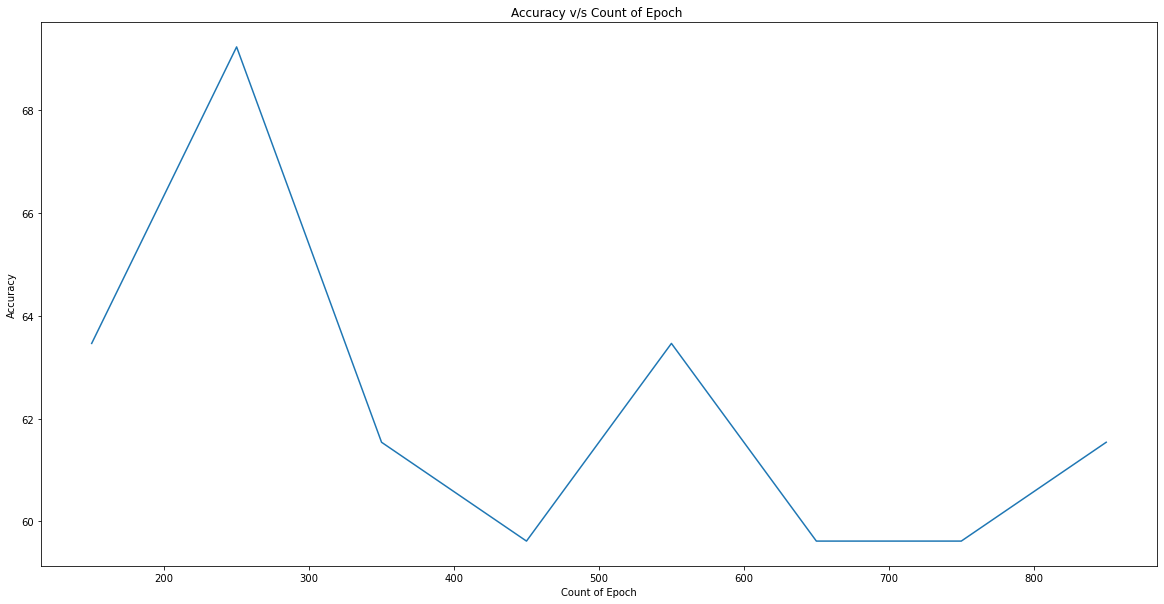

In [292]:
plt.plot(n_epoch,accuracy1)
# naming the x axis 
plt.xlabel('Count of Epoch') 
# naming the y axis 
plt.ylabel('Accuracy') 
    
# giving a title to my graph 
plt.title('Accuracy v/s Count of Epoch ') 
    
# function to show the plot 
plt.show() 

For 250 iterations we got the highest accuracy of 69.23076923076923. Also, the data set is not completely linearly separable as the accuracy is not near to 99 or 100. So, we can further try other algorithms like Pocket algorithm which takes the best hypothesis using the PLA and keeps that best hypothesis in the pocket and hence the name Pocket Algorithm.

# Linear Regression (Psuedo Inverse)

 source  : Class Material and
 1. https://mubaris.com/posts/linear-regression/#:~:text=%20Linear%20Regression%20from%20Scratch%20in%20Python%20,errors.%20Subscribe%20for%20more%20Awesome%21%20%20More%20

In [171]:
#Generation of the data and labeling.

The Dataset consists of the Head size in cm^3 and the Brain weight(grams) along with Gender and Age range. Here I am considering Head size as the input feature and the Brain weight as the output feature. I have loaded the data and randomly divided the data into training data and test data.



In [293]:
# Collecting X and Y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('D:\Fall 2021\Applied ML - AIT 736\HW2\headbrain.csv')
print(data.shape)
data.head()
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
X,Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=0)

print('length of traning data(input features): ',len(x_train),'\n\n')

print('length of testing data(input feature): ',len(x_test),'\n\n')
print('length of traning data(output features): ',len(y_train),'\n\n')
print('length of testing data(output feature): ',len(y_test),'\n\n')
print('Display of the Training and Testing Data \n')
print((x_train),'\n\n')
print((x_test),'\n\n')
print((y_train),'\n\n')
print((y_test),'\n\n')



(237, 4)
length of traning data(input features):  177 


length of testing data(input feature):  60 


length of traning data(output features):  177 


length of testing data(output feature):  60 


Display of the Training and Testing Data 

[3170 3391 3297 3399 3497 3899 3473 4177 3618 3393 3269 4270 3415 4036
 3558 3156 2937 3962 4208 3777 3302 4747 3787 3735 3866 3890 3582 3695
 4424 3609 4051 4012 3703 3830 3793 4006 3548 3853 3309 3614 3360 3704
 3566 3505 3832 4022 3891 3586 3878 3707 4308 3779 3214 3791 2989 4442
 3666 4261 3669 3903 3381 3804 3354 3443 3436 4057 4204 3685 3571 3503
 3654 3899 3156 3284 3594 4512 3700 3779 4381 3644 3641 3850 3233 3530
 3710 3438 3930 3495 3532 3165 3352 3785 4430 3933 4200 2864 3979 3228
 3058 3689 3318 3277 3993 3937 3876 3814 4166 3329 3738 3399 3394 4315
 3648 4046 3692 3466 3334 3667 4063 3497 3158 4053 4158 3454 3181 3383
 3292 3323 3796 3556 3124 3642 2720 3389 4103 3358 3175 3493 3267 4175
 3561 3478 3249 3394 3203 3835 3344 3499 3451 32

Now I am applying Simple Linear Regression with input feature as Head size and output feature as Brain weight. To allow for y-intercept we need another predictor x0. Having an intercept gives our model the freedom to capture all the linear patterns while a model with no intercept can capture only those patterns that pass through origin. The y-intercept is constant across all the points so we can set it as 1.let's say the matrix form is Ax=B i., x= (A inverse)* B where x matrix of all the weights of the input features, A is the matrix consisting of intercept and the input feature values, B is the matrix with the output features. To calculate A inverse there are few conditions like:
1. n=m i., the number of rows(data points) must be equal to number of columns(features). 
2. A must be singular i.e., all the input features must be independant of each other

These conditions are rarely satisfied in the real-world problems. So for the problems where these conditions are not satisfied, we can still calulate the inverse of A using Moore-Penrose Pseudoinverse. 

### Moore-Penrose Pseudoinverse

In [294]:
x0 = np.ones(len(x_train))
print('the intercept x0 is: ',x0,'\n')
A = np.concatenate((np.matrix(x0).T, np.matrix(x_train).T), axis=1)
print('matrix A: \n',A)
len(A) #length of the matrix A

the intercept x0 is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.] 

matrix A: 
 [[1.000e+00 3.170e+03]
 [1.000e+00 3.391e+03]
 [1.000e+00 3.297e+03]
 [1.000e+00 3.399e+03]
 [1.000e+00 3.497e+03]
 [1.000e+00 3.899e+03]
 [1.000e+00 3.473e+03]
 [1.000e+00 4.177e+03]
 [1.000e+00 3.618e+03]
 [1.000e+00 3.393e+03]
 [1.000e+00 3.269e+03]
 [1.000e+00 4.270e+03]
 [1.000e+00 3.415e+03]
 [1.000e+00 4.036e+03]
 [1.000e+00 3.558e+03]
 [1.000e+00 3.156e+03]
 [1.000e+00 2.937e+03]
 [1.000e+00 3.962e+03]
 [1.000e+0

177

Lets see how to calulate the Pseudoinverse. There is an inbuilt function to calculate the pseudoinverse using numpy package i.e., np.linalg.pinv(A). We are calculating the weights i.e., matrix x by taking the dot product of psudo inverse of A and the output feature matrix. ( Ax = B )

In [295]:
#we can calculate the weights $w$ using the equation $w = X^+y$:
w = np.dot(np.linalg.pinv(A), y_train)
w
b0=w[0,0]
b1=w[0,1]
print(w)
print ('the intercept is: ', b0)
print('the weight of the input feature(Head size): ',b1)
#325.57342104944127
#  0.26342933948939934

[[3.53633385e+02 2.55904750e-01]]
the intercept is:  353.63338516049646
the weight of the input feature(Head size):  0.25590475018819747


There we have our coefficients.

Brain Weight = 353.63338516049646 + 0.25590475018819747 * Head Size

Psuedo inverse can also be calculated other than using np.linalg.pinv(A) i.e., by using Singular value Decomposition. we can calculate the left-singular vectors(U - Orthogonal matrix), right-singular vectors (V is orthogonal matrix) and singular values of A (D is diagonal matrix) using the singular value decompostion. Here Singular value Decomposition comes into play as the number of rows(data points) is not equal to number of columns(features). The matrix is said to be an orthogonal matrix if the product of a matrix and its transpose gives an identity value.


In [185]:
U, d, VT = np.linalg.svd(A)

In [193]:
print(U)
U.shape

[[ 6.50860793e-02  1.04541135e-01 -7.65463319e-02 ... -7.38815066e-02
  -7.71296768e-02 -7.53354494e-02]
 [ 6.96236258e-02  5.91623889e-02 -6.98710037e-02 ...  5.47489634e-02
  -9.71509965e-02 -1.32443520e-02]
 [ 6.76936287e-02  7.84637562e-02  9.90665594e-01 ... -1.46630854e-03
  -1.10567753e-02 -5.75918413e-03]
 ...
 [ 8.00743550e-02 -4.53524614e-02 -1.65260609e-03 ...  9.91400247e-01
  -1.31837626e-04 -4.80935276e-03]
 [ 6.49834199e-02  1.05567804e-01 -1.10159937e-02 ...  9.52414832e-05
   9.86551696e-01 -5.96710742e-03]
 [ 7.33193650e-02  2.22023239e-02 -5.84383675e-03 ... -4.70770783e-03
  -6.09254159e-03  9.94672414e-01]]


(177, 177)

In [194]:
print(d)
d.shape

[4.87047336e+04 1.32371614e+00]


(2,)

In [196]:
print(VT)
VT.shape

[[ 2.71803525e-04  9.99999963e-01]
 [ 9.99999963e-01 -2.71803525e-04]]


(2, 2)

In [198]:
D = np.diag(d)
print(D)
D.shape

[[4.87047336e+04 0.00000000e+00]
 [0.00000000e+00 1.32371614e+00]]


(2, 2)

In [201]:
Dinv = np.linalg.inv(D)
print(Dinv)
Dinv.shape

[[2.05318852e-05 0.00000000e+00]
 [0.00000000e+00 7.55448974e-01]]


(2, 2)

In [128]:
Dplus = np.concatenate((Dinv,  np.zeros((len(A)-2,2)).T), axis=1)
Dplus

array([[2.05318852e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

Psuedo inverse of A (i.e., Aplus) = V * Dplus * U transpose

In [296]:
Aplus=np.dot(VT.T, np.dot(Dplus, U.T))
T=np.dot(Aplus,y_train)
print(T[0,0])
print(T[0,1])

353.63338516049646
0.25590475018819747


Checking if Aplus we calulated is similar to the matrix obtained from np.linalg.pinv(A)

In [210]:
Aplus #similar to np.linalg.pinv(A)
if (Aplus.all() == np.linalg.pinv(A).all()):
    print('The calculated psuedo inverse (using Singular Value Decomposition) is simliar to the one calculated using np.linalg.pinv(A)')
else:
    print('not equal')

The calculated psuedo inverse (using Singular Value Decomposition) is simliar to the one calculated using np.linalg.pinv(A)


In [211]:
np.linalg.pinv(A)

matrix([[ 7.89754908e-02,  4.46941647e-02,  5.92753623e-02,
          4.34532117e-02,  2.82515377e-02, -3.41063496e-02,
          3.19743967e-02, -7.72294657e-02,  9.48212386e-03,
          4.43839265e-02,  6.36186977e-02, -9.16555442e-02,
          4.09713058e-02, -5.53576694e-02,  1.87892712e-02,
          8.11471586e-02,  1.15118246e-01, -4.38788544e-02,
         -8.20381585e-02, -1.51818167e-02,  5.84997666e-02,
         -1.65647366e-01, -1.67330079e-02, -8.66681350e-03,
         -2.89874186e-02, -3.27102775e-02,  1.50664123e-02,
         -2.46204859e-03, -1.15543889e-01,  1.08781960e-02,
         -5.76844563e-02, -5.16348105e-02, -3.70300157e-03,
         -2.34031302e-02, -1.76637226e-02, -5.07040958e-02,
          2.03404625e-02, -2.69708700e-02,  5.74139328e-02,
          1.01026004e-02,  4.95028575e-02, -3.85812069e-03,
          1.75483182e-02,  2.70105847e-02, -2.37133684e-02,
         -5.31860017e-02, -3.28653966e-02,  1.44459358e-02,
         -3.08488480e-02, -4.32347806e-0

### Plotting x_train (Head size) and y_train (Brain Weight)

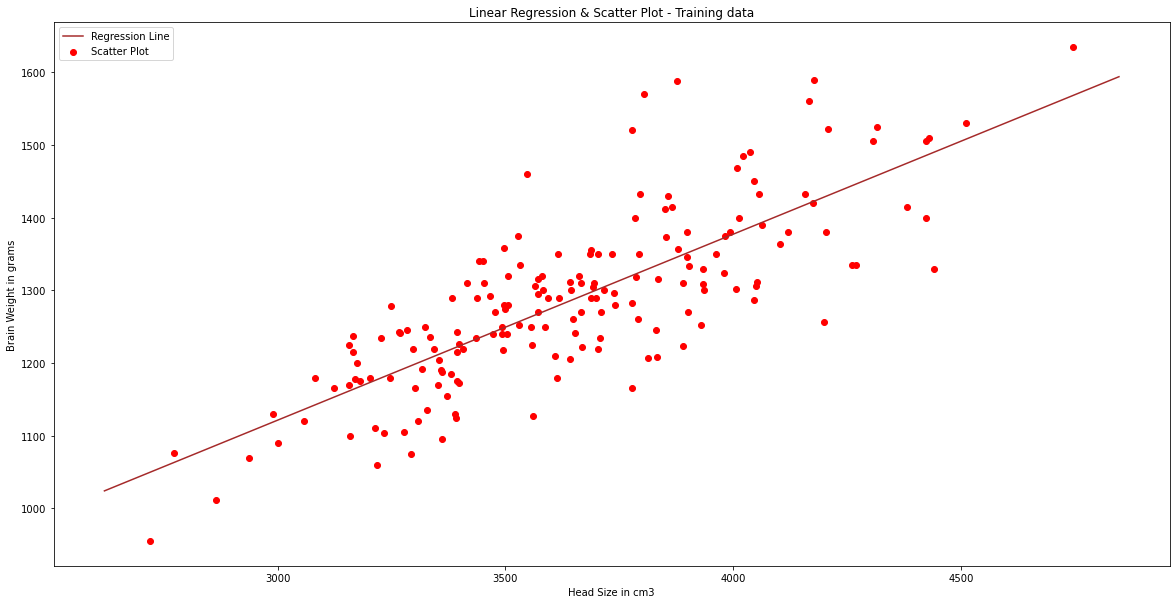

In [297]:
# Plotting Values and Regression Line

max_x = np.max(x_train) + 100
min_x = np.min(x_train) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='brown', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x_train, y_train, c='red', label='Scatter Plot')
plt.title('Linear Regression & Scatter Plot - Training data')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()
#len(y_train)

Let's see how good our model is. There are many methods to evaluate these models. We will use Root Mean Squared Error and also the Coefficient of Determination((R^2) Score). Root Mean Squared Error is the square root of sum of all errors (difference between the true output feature and the predicted output feature) divided by number of values. 


In [298]:
y_pred_test=list()
for i in range(len(x_test)):
    y_pred = b0 + b1 * x_test[i]
    y_pred_test.append(y_pred)
    
y_pred_test  

y_pred_train=list()
for i in range(len(x_train)):
    y_pred = b0 + b1 * x_train[i]
    y_pred_train.append(y_pred)
    
y_pred_train  
y_pred_test  

[1306.622674861344,
 1295.362865853063,
 1385.4413379193088,
 1255.4417248237044,
 1321.4651503722594,
 1286.9180090968525,
 1502.1339040051266,
 1257.744867575398,
 1385.9531474196851,
 1339.122578135245,
 1406.425527434741,
 1138.4932539876982,
 1202.7253462849358,
 1334.7721973820455,
 1221.406393048674,
 1233.6898210577076,
 1283.0794378440296,
 1355.7563868974778,
 1243.9260110652353,
 1278.217247590454,
 1238.5520113112834,
 1418.197145943398,
 1353.453244145784,
 1271.0519145851845,
 1327.0950548763997,
 1312.7643888658606,
 1165.1073480072705,
 1285.1266758455354,
 1487.2914284942112,
 1084.7532564481767,
 1189.9301087755257,
 1272.0755335859371,
 1243.9260110652353,
 1378.5319096642274,
 1342.1934351375035,
 1227.0362975528144,
 1326.8391501262113,
 1375.9728621623453,
 1332.2131498801637,
 1246.7409633173056,
 1340.9139113865622,
 1145.6585869929677,
 1144.3790632420266,
 1345.5201968899498,
 1441.9962877109,
 1264.3983910802913,
 1223.9654405505562,
 1158.4538245023775,
 114

In [299]:
# Calculating Root Mean Squares Error

rmse = 0
for i in range(len(x_train)):
    y_pred = b0 + b1 * x_train[i]
    rmse += (y_train[i] - y_pred) ** 2
rmse = np.sqrt(rmse/len(x_train))
print(rmse)

from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_train, y_pred_train)) 


72.04576447166816


72.04576447166818

R^2 Score usually range from 0 to 1. It will also become negative if the model is completely wrong. 0.6260121814103357 obtained is not so bad as it ranges between 0 to 1.

In [300]:
#calculating R^2
mean_y = np.mean(y_train)
ss_t = 0
ss_r = 0
for i in range(len(x_train)):
    y_pred = b0 + b1 * x_train[i]
    ss_t += (y_train[i] - mean_y) ** 2
    ss_r += (y_train[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6260121814103357


#### Plotting actual output features v/s predicted output features

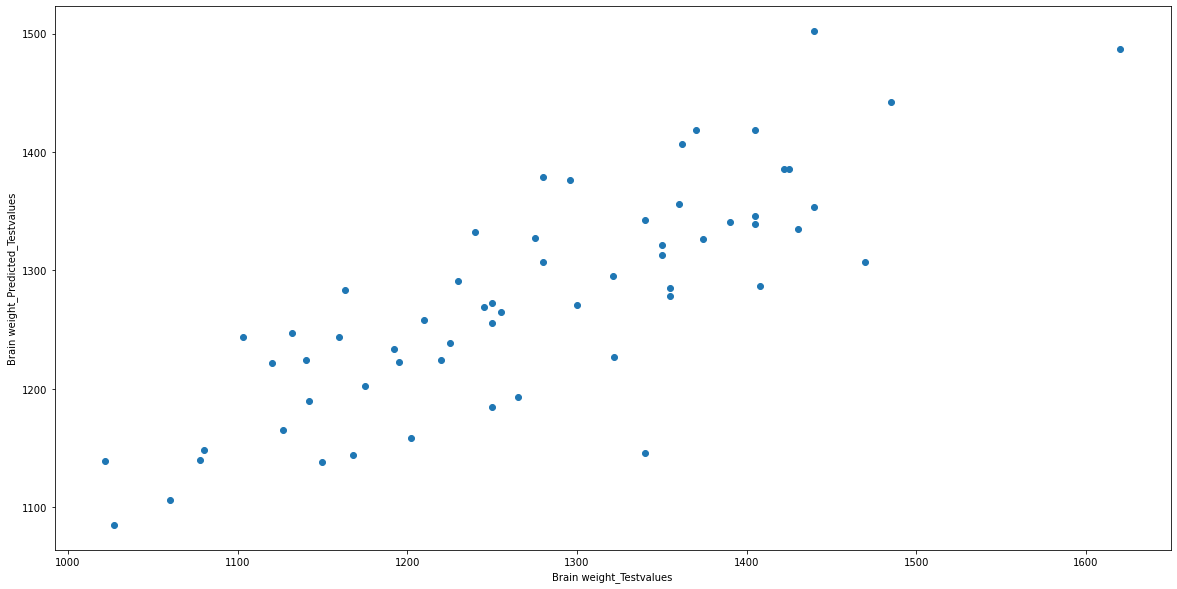

In [301]:
# As you can see, our predicted values are not that close to the actual values for the observations in the data set but are also not too far. 
# Generallly a perfectly straight diagonal line in this scatterplot would indicate that our model perfectly predicted the y-array values.
# Here we don't have a perfect diagonal but the data on the whole gives the feel of a diagonal but the datapoints are not too close to each other, this can't be a perfect model.
plt.scatter(y_test, y_pred_test)
plt.xlabel('Brain weight_Testvalues')
plt.ylabel('Brain weight_Predicted_Testvalues')
plt.show() 

#### Plotting Histogram of Residuals

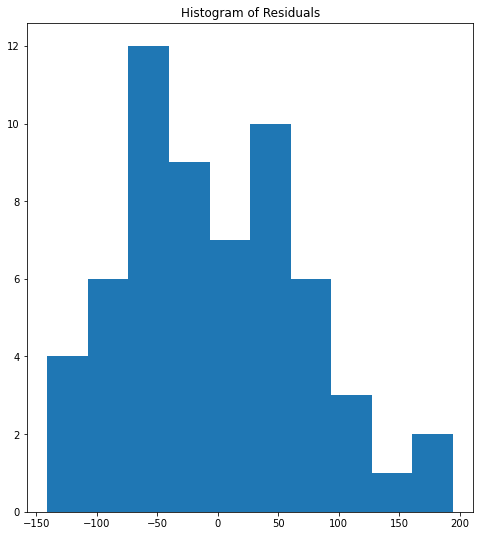

In [302]:
plt.figure(figsize=(8,9))#facecolor='red',edgecolor='blue')
plt.title('Histogram of Residuals')
plt.hist(y_test - y_pred_test)
plt.show()

Here we observe that the residuals from our machine learning model appear to be normally distributed but not that accurately as we observe a bimodal distribution. This is not a very good sign. If there is a perfect Normal Distribution then we can say that out model can best fit the test data. May be we should try with other input features (multiple linear regression model) and with more data points to get a better fit of the data.

# Question 1 - Finding weights (Try)

Tried with assumed data points, so couldn't get the exact weights like the weight done computationally

In [244]:
def prediction(row,weights):
    activation =weights[0]
    for i in range(len(row)-1):
        #print('jhj')
        
        activation += weights[i+1] * row[i]
        #print(activation)
    if(activation >= 0):
        return 1
    else:
        return 0

In [264]:
dataset =[[-1,2,0]]#
test_s =[[-4,4,1],[1,5,1],[-3,1,1],[3,3,0],[-1,-4,0],[3,-3,0]]
def train_weight(train_data,learning_rate,n_epoch):
    weight = [0 for i in range (len(train_data[0]))] 
    #print(weight)
    for epoch in range(n_epoch):
        sum_squ_error = 0
        for row in train_data:
            print('each row of dataset: ',row,'weights:  ',weight)
            prediction_ =prediction(row,weight)
            actual=row[-1]
            #print('prediction:   ',prediction_, 'actual :', actual)
            error = row[-1] - prediction_
            sum_squ_error += error**2
            #print(sum_squ_error)
            weight[0]= weight[0] + learning_rate*error
            for i in range(len(row)-1):
                weight[i+1]  = weight[i+1] + (error * learning_rate * row[i])
                #print(( row[i] ))
        print('epoch: ',epoch, 'learning_rate: ',learning_rate,'sum_squ_error: ',sum_squ_error )
    return weight
    

In [265]:
s=train_weight(dataset,0.1,8)
print(s)

each row of dataset:  [-1, 2, 0] weights:   [0, 0, 0]
epoch:  0 learning_rate:  0.1 sum_squ_error:  1
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  1 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  2 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  3 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  4 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  5 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  6 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  7 learning_rate:  0.1 sum_squ_error:  0
[-0.1, 0.1, -0.2]


In [266]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train,test2,learning_rate,n_epoch):
    weights = (train_weight(train,learning_rate,n_epoch))
    #print(weights)
    wt=list()
    for a in weights:
        wt.append(-a)
    print(wt)    
    predictions_test1=list()
    for row in test2:
        print('actual:  ', row[-1])
        t=([float(x) for x in row])
        #print('--------------',len(t),len(weights))
        prediction_test =prediction(t, weights)
        predictions_test1.append(prediction_test)
    #print('pred', (predictions_test1) ,len(test2) )  
    return predictions_test1 

print('predicted: ',perceptron(dataset,test_s,0.1,8))#wt [1, 1, 1, 1, 0, 0]

each row of dataset:  [-1, 2, 0] weights:   [0, 0, 0]
epoch:  0 learning_rate:  0.1 sum_squ_error:  1
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  1 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  2 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  3 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  4 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  5 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  6 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  7 learning_rate:  0.1 sum_squ_error:  0
[0.1, -0.1, 0.2]
actual:   1
actual:   1
actual:   1
actual:   0
actual:   0
actual:   0
predicted:  [0, 0, 0, 0, 1, 1]


Here we see mostly the predicted are the opposite of the actual. So changing the signs of the weights can predict a better values.


In [268]:
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train,test2,learning_rate,n_epoch):
    weights = (train_weight(train,learning_rate,n_epoch))
    #print(weights)
    wt=list()
    for a in weights:
        wt.append(-a)
    print('weights :  ',wt)    
    predictions_test1=list()
    for row in test2:
        print('actual:  ', row[-1])
        t=([float(x) for x in row])
        #print('--------------',len(t),len(weights))
        prediction_test =prediction(t, wt)
        predictions_test1.append(prediction_test)
    #print('pred', (predictions_test1) ,len(test2) )  
    return predictions_test1 

print('predicted: ',perceptron(dataset,test_s,0.1,8))#wt [1, 1, 1, 1, 0, 0]

each row of dataset:  [-1, 2, 0] weights:   [0, 0, 0]
epoch:  0 learning_rate:  0.1 sum_squ_error:  1
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  1 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  2 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  3 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  4 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  5 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  6 learning_rate:  0.1 sum_squ_error:  0
each row of dataset:  [-1, 2, 0] weights:   [-0.1, 0.1, -0.2]
epoch:  7 learning_rate:  0.1 sum_squ_error:  0
weights :   [0.1, -0.1, 0.2]
actual:   1
actual:   1
actual:   1
actual:   0
actual:   0
actual:   0
predicted:  [1, 1, 1, 1, 0,

In [269]:
#accuracy
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
test_y =[1,1,1,0,0,0]
predicted =[1, 1, 1, 1, 0, 0]
accuracy = accuracy_metric(test_y, predicted)
print(accuracy) #69.23076923076923

83.33333333333334


When (-1,0) and (0,2) are substituted they need to satisfy the equation. 
the equation with weights  [0.1, -0.1, 0.2] is w0+w1x1+w2x2

w0 + w1x1+ w2x2

0.1 - 0.1(x1) + (0.2) x2

In [274]:
# at -1,0
0.1 - (0.1*-1) + ((0.2)*(0)) # 0.2 which is not satisfying the sign of the equation i.e., 0

0.2

In [277]:
# at 0,2
0.1 - (0.1* 0) + ((0.2)*(2)) # 0.5 0.2 which is not satisfying the sign of the equation  i.e., 0

0.5

So, I guess the weights are not perfect as i have assumed the datapoints of the test